In [1]:
import kagglehub
import os
import shutil

# Download latest version
download_path = kagglehub.dataset_download("mattop/ai-cat-and-dog-images-dalle-mini", force_download=True)
print("Path to download dataset files:", download_path)

# Move data to the working dir
data_path = "../data"
if os.path.exists(data_path):
    shutil.rmtree(data_path)
os.mkdir(data_path)

for folders in os.listdir(download_path):
    source = os.path.join(download_path, folders)
    dest = os.path.join(data_path, folders)
    os.rename(source, dest)

d:\Envs\Anaconda3\envs\gpuPytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.23M/3.23M [00:01<00:00, 2.60MB/s]

Extracting files...


Path to download dataset files: C:\Users\charles0618\.cache\kagglehub\datasets\mattop\ai-cat-and-dog-images-dalle-mini\versions\2


In [2]:
import numpy as np
import requests

def get_image_feature(img_path, api_url):
    """ 抽取图片的特征向量 """
    files = {"image": open(img_path, "rb")}
    r = requests.post(api_url, files=files)
    r_dict = r.json()
    return np.array(r_dict['embedding'])

In [3]:
import random

# 获取猫猫狗狗的图片路径
dogs_path = '../data/DogsCats/Dogs'
cats_path = '../data/DogsCats/Cats'
img_paths = []
folders = [dogs_path, cats_path]

for folder in folders:
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        img_paths.append(file_path)

random.shuffle(img_paths)  # 打乱图片路径

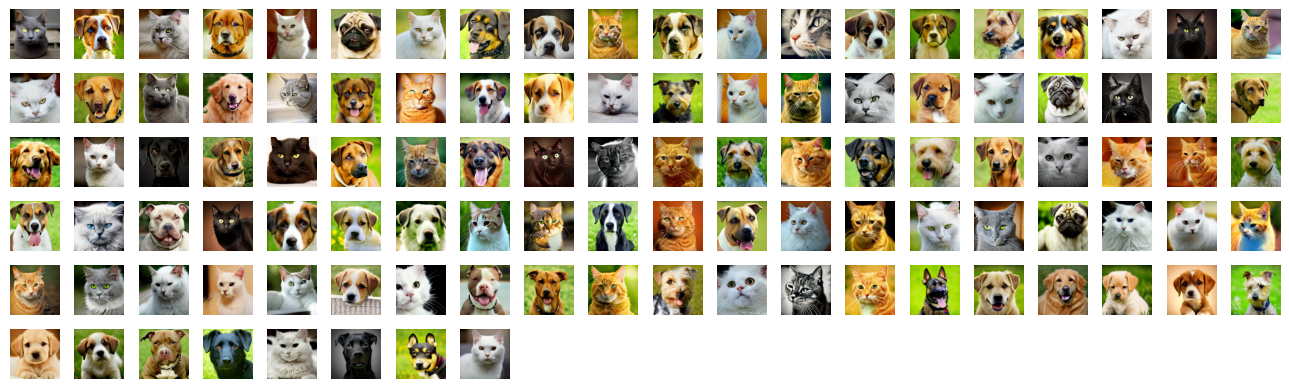

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import math

# 展示图片数据
num_images = len(img_paths)
num_cols = 20
num_rows = (num_images + num_cols - 1) // num_cols  # 计算行数

# 创建子图网格
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 4))
axes = axes.flatten()

for i, img_path in enumerate(img_paths):
    img = Image.open(img_path)  
    axes[i].imshow(img)         
    axes[i].axis('off')         

for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()  
plt.show()

In [5]:
# 抽取这些图片的特征向量
url = "http://bl.mmd.ac.cn:8889/image_query"
features = []
for i, img_path in enumerate(img_paths):
    feature = get_image_feature(img_path, url)
    features.append(feature)
    print(f"Get feature of image[{i + 1}/{len(img_paths)}]")

Get feature of image[1/108]
Get feature of image[2/108]
Get feature of image[3/108]
Get feature of image[4/108]
Get feature of image[5/108]
Get feature of image[6/108]
Get feature of image[7/108]
Get feature of image[8/108]
Get feature of image[9/108]
Get feature of image[10/108]
Get feature of image[11/108]
Get feature of image[12/108]
Get feature of image[13/108]
Get feature of image[14/108]
Get feature of image[15/108]
Get feature of image[16/108]
Get feature of image[17/108]
Get feature of image[18/108]
Get feature of image[19/108]
Get feature of image[20/108]
Get feature of image[21/108]
Get feature of image[22/108]
Get feature of image[23/108]
Get feature of image[24/108]
Get feature of image[25/108]
Get feature of image[26/108]
Get feature of image[27/108]
Get feature of image[28/108]
Get feature of image[29/108]
Get feature of image[30/108]
Get feature of image[31/108]
Get feature of image[32/108]
Get feature of image[33/108]
Get feature of image[34/108]
Get feature of image[35

In [31]:
def k_means(points, k):
    """ k-means聚类 """
    n = len(points)
    centor_ids = [random.randint(0, n) for _ in range(k)]  # 随机初始化簇心
    labels = np.zeros(n, dtype=int)
    centors = []
    for i in range(k):
        centor_id = centor_ids[i]
        centors.append(points[centor_id])
        labels[centor_id] = i
    
    for _ in range(5000):
        # 计算其他各点到簇心的距离
        for i, point in enumerate(points):
            min_dist = float('inf')
            for j, centor in enumerate(centors):
                dist = np.linalg.norm(point - centor)
                # 某点到新簇心的距离更近，则更新其标签
                if dist < min_dist:
                    min_dist = dist
                    labels[i] = j

        # 更新簇心
        point_counts = np.zeros(k)
        cluster_sum = np.zeros((k, len(points[0])))
        for i, point in enumerate(points):
            label = int(labels[i])
            point_counts[label] += 1
            cluster_sum[label] += point
        
        for i, centor in enumerate(centors):
            centor = cluster_sum[i] / point_counts[i]
    
    return centors, labels

In [32]:
centors, labels = k_means(features, 2)
centors, labels

([array([ 0.01943606,  0.05427622,  0.00616866, ..., -0.04362078,
          0.00228874,  0.00384042]),
  array([ 0.02006244,  0.02677876,  0.01871612, ..., -0.01904784,
          0.02664004, -0.00995685])],
 array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]))

In [33]:
len(img_path)

32

In [34]:
cluster1_paths = []
cluster2_paths = []
for i, label in enumerate(labels):
    if label == 1:
        cluster1_paths.append(img_paths[i])
    else:
        cluster2_paths.append(img_paths[i])

In [35]:
len(cluster1_paths)

54

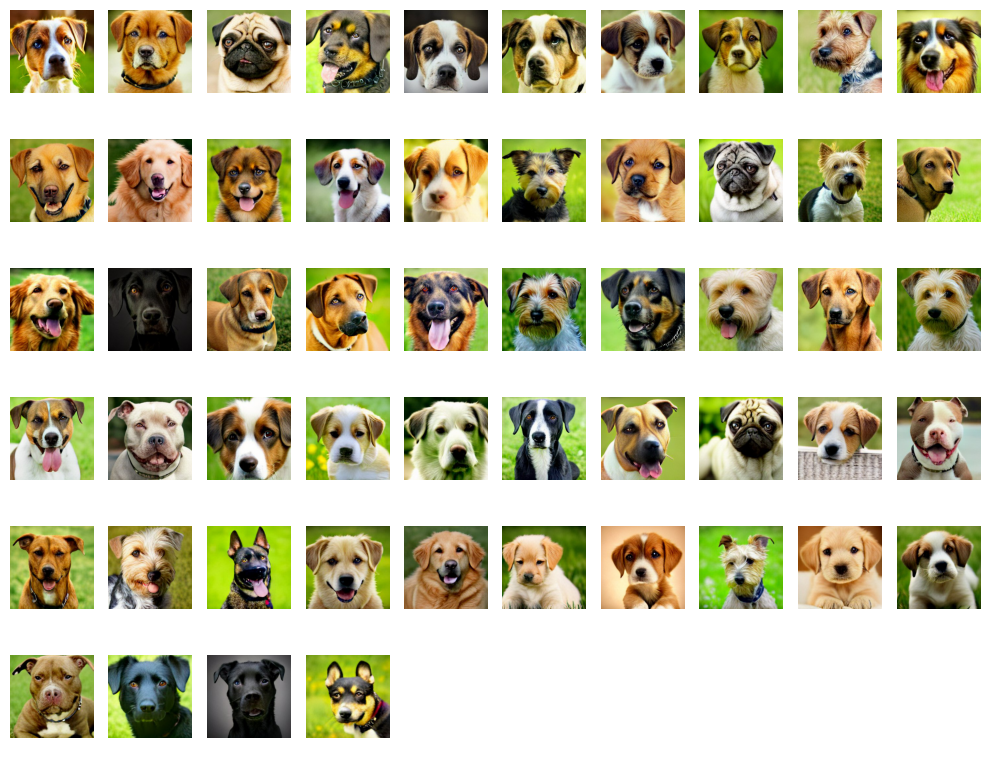

In [36]:
# 展示图片数据
num_images = len(cluster1_paths)
num_cols = 10
num_rows = (num_images + num_cols - 1) // num_cols  # 计算行数

# 创建子图网格
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
axes = axes.flatten()

for i, img_path in enumerate(cluster1_paths):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

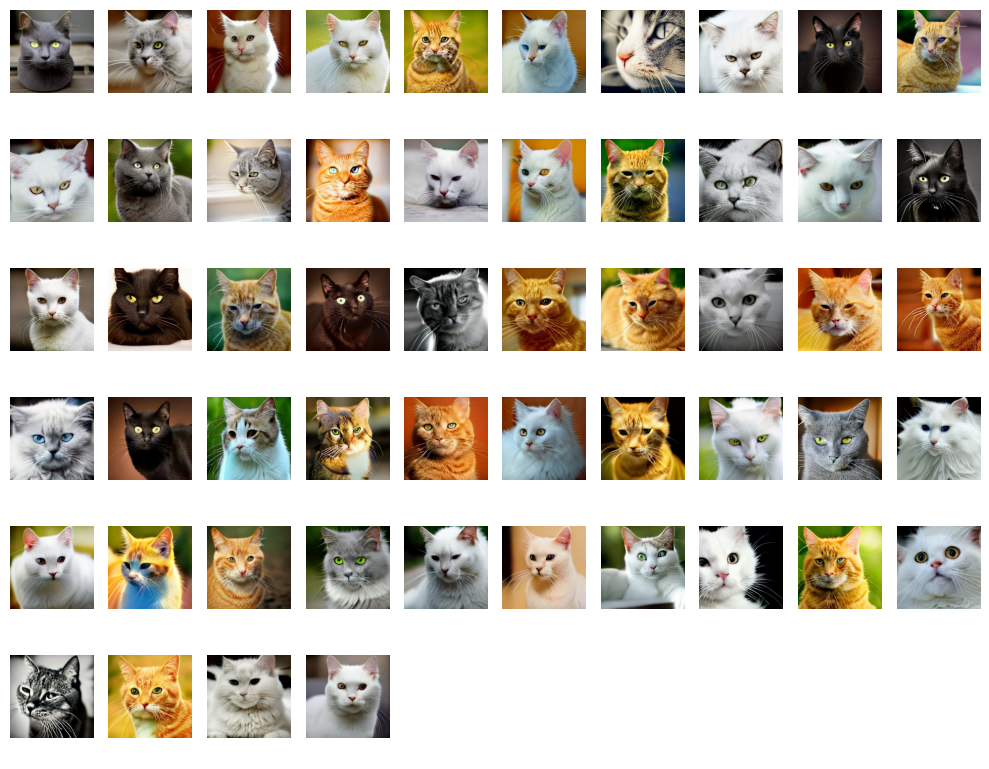

In [37]:
# 展示图片数据
num_images = len(cluster2_paths)
num_cols = 10
num_rows = (num_images + num_cols - 1) // num_cols  # 计算行数

# 创建子图网格
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
axes = axes.flatten()

for i, img_path in enumerate(cluster2_paths):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()